<a href="https://colab.research.google.com/github/peeyushsinghal/dimensionality_reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

## Singular Value Decomposition (SVD)

### SVD using Numpy

In [1]:
import numpy as np

In [2]:
#Creating a matrix A
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
A

array([[3, 4, 3],
       [1, 2, 3],
       [4, 2, 1]])

In [5]:
#Performing SVD
U, S, VT = np.linalg.svd(A)
print (f'U = \n{U} \n S = \n {S} \n VT = {VT} ')

U = 
[[-0.73553325 -0.18392937 -0.65204358]
 [-0.42657919 -0.62196982  0.65664582]
 [-0.52632788  0.76113306  0.37901904]] 
 S = 
 [7.87764972 2.54031671 0.69958986] 
 VT = [[-0.60151068 -0.61540527 -0.5093734 ]
 [ 0.73643349 -0.18005275 -0.65210944]
 [ 0.30959751 -0.76737042  0.5615087 ]] 


In [6]:
#Checking if we can remake the original matrix using U,S,VT
A_remake = (U @ np.diag(S) @ VT)
print(A_remake)

[[3. 4. 3.]
 [1. 2. 3.]
 [4. 2. 1.]]


### SVD using scikit-learn (TruncatedSVD)

In [7]:
#Importing required modules
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [19]:
#Creating array 
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
A

array([[3, 4, 3],
       [1, 2, 3],
       [4, 2, 1]])

In [21]:
#Fitting the SVD class
n_components = 2
trun_svd =  TruncatedSVD(n_components = n_components)
A_transformed = trun_svd.fit_transform(A)

In [18]:
print("Singular values:")
print(trun_svd.singular_values_)

Singular values:
[7.87764972 2.54031671]


In [22]:
#Printing the transformed matrix
print(f'Transformed Matrix: with {n_components} components')
print(A_transformed)

Transformed Matrix: with 2 components
[[ 5.7942733  -0.46723885]
 [ 3.3604414  -1.58000033]
 [ 4.14622666  1.93351902]]


## Principal Component Analysis (PCA)

### PCA Process

In [5]:
# Loading Data
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
print(cancer['target'],cancer['target_names']) # the dependent variable is separated from main data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# loading data into dataframe for analysis
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])
df.head() # the data does not have a dependent parameter 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# visualizing data
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [23]:
## scaling the data - mean and standard deviation treatment for all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [24]:
scaled_data.shape

(569, 30)

In [25]:
## initializing PCA
from sklearn.decomposition import PCA
n_components = 2 
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

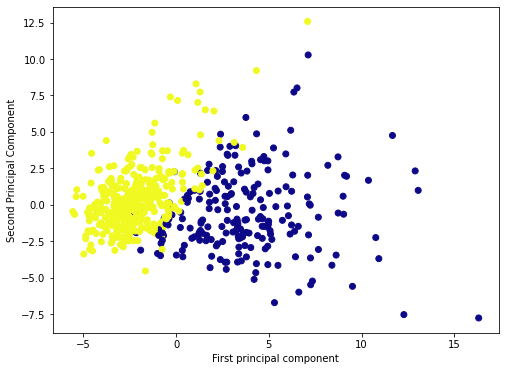

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Results Interpretation and analysis

In [29]:
print(pca.components_, pca.components_.shape)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]] (2, 30)


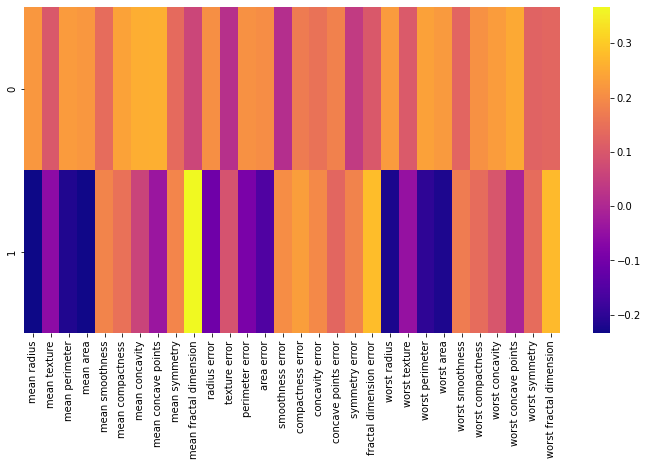

In [31]:
# Understanding coorelation of PCA components and original features

df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
import seaborn as sns
sns.heatmap(df_comp,cmap='plasma',)


## Latent Discrimination Analysis (LDA)

### LDA using scikit-learn

In [33]:
# Importing Libraries
import numpy as np
import pandas as pd

In [34]:
# Importing Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# Data Pre-processing
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [43]:
# Test Train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

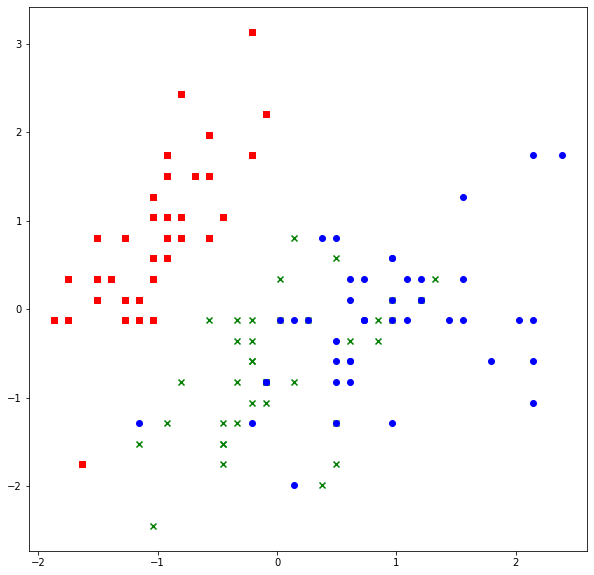

In [45]:
import matplotlib.pyplot as plt
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train[:,0][y_train==l],X_train[:,1][y_train==l],c=c,marker=m)

In [46]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_post_lda = lda.fit_transform(X_train, y_train)
X_test_post_lda = lda.transform(X_test)

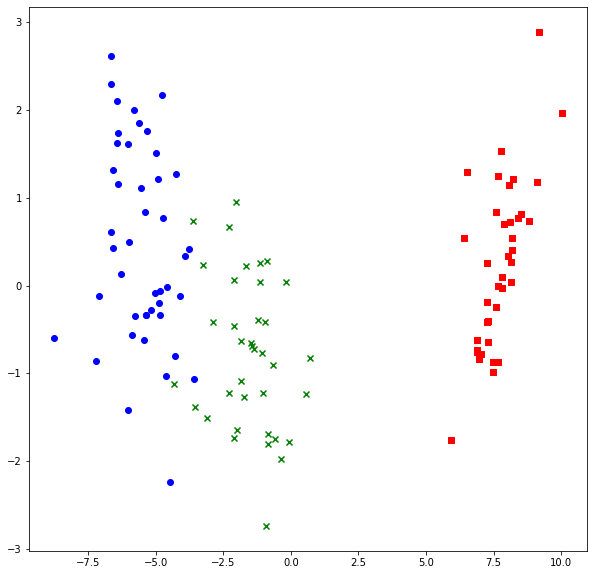

In [50]:
# Visualizing LDA 
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train_post_lda[:,0][y_train==l],X_train_post_lda[:,1][y_train==l],c=c,marker=m)